#week-3 Assignment

##Read CSV file teachingrating.csv

##Display information about the dataset

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import skew, norm

##Task 1: Generate a histogram for the "beauty" variable and provide a brief analysis of the data distribution.

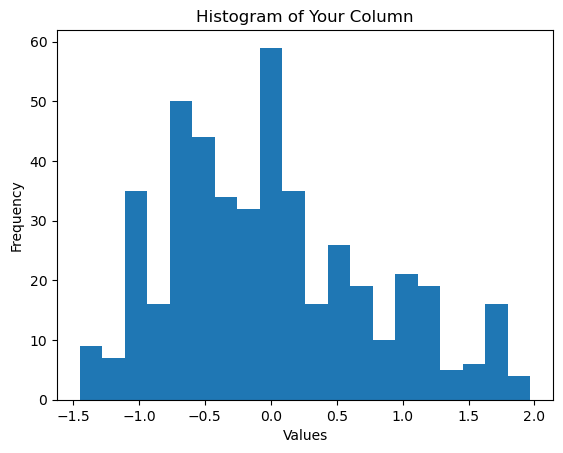

In [7]:
df = pd.read_csv('week-03_teachingratings.csv')

df['beauty'].plot(kind='hist', bins=20)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Your Column')
plt.show()
print("\n\n")

##Task 2: Does average beauty score differ by gender? Produce the means and standard deviations for both male and female instructors.


Fill it:
        mean   std   var

female  ---   ---  ---

male    ---   ---  ---

In [10]:
male_mean = df[df['gender'] == 'male']['beauty'].mean()
female_mean = df[df['gender'] == 'female']['beauty'].mean()

male_std = df[df['gender'] == 'male']['beauty'].std()
female_std = df[df['gender'] == 'female']['beauty'].std()

male_var = df[df['gender'] == 'male']['beauty'].var()
female_var = df[df['gender'] == 'female']['beauty'].var()

print('Male : mean=',male_mean,'  std=',male_std,'  var=',male_var)
print('Female : mean=',female_mean,'  std=',female_std,'  var=',female_var)
print("\n\n")

Male : mean= -0.084482238273512   std= 0.7571299272149641   var= 0.5732457266845368
Female : mean= 0.11610907124450924   std= 0.8178096472554824   var= 0.6688126191441366





##Task 3: What is the Median evaluation score for tenured Professors?

In [12]:
tenured_prof = df[df['tenure'] == 'yes']
tenured_median = tenured_prof['eval'].median()
print("tenured professor median : ", tenured_median)
print("\n\n")

tenured professor median :  4.0





##Task 4: Does average age differ by tenure? Produce the means and standard deviations for both tenured and untenured professors.

In [14]:
tenured_prof = df[df['tenure'] == 'yes']
untenured_prof = df[df['tenure'] == 'no']

tenured_prof_mean_age = tenured_prof['age'].mean()
untenured_prof_mean_age = untenured_prof['age'].mean()

tenured_prof_std_age = tenured_prof['age'].std()
untenured_prof_std_age = untenured_prof['age'].std()

print(f"tenured professor mean age : {tenured_prof_mean_age}")
print(f"tenured professor mean age : {untenured_prof_mean_age}")
print()
print(f"tenured professor std age : {tenured_prof_std_age}")
print(f"tenured professor std age : {untenured_prof_std_age}")
print("\n\n")

tenured professor mean age : 47.850415512465375
tenured professor mean age : 50.18627450980392

tenured professor std age : 10.420055773692862
tenured professor std age : 6.946372216733223





##Task 5: Analyze the generated plots and answer the following questions:
Task 5: 1. What trends do you observe between "age" and "eval" across different "tenure" groups?


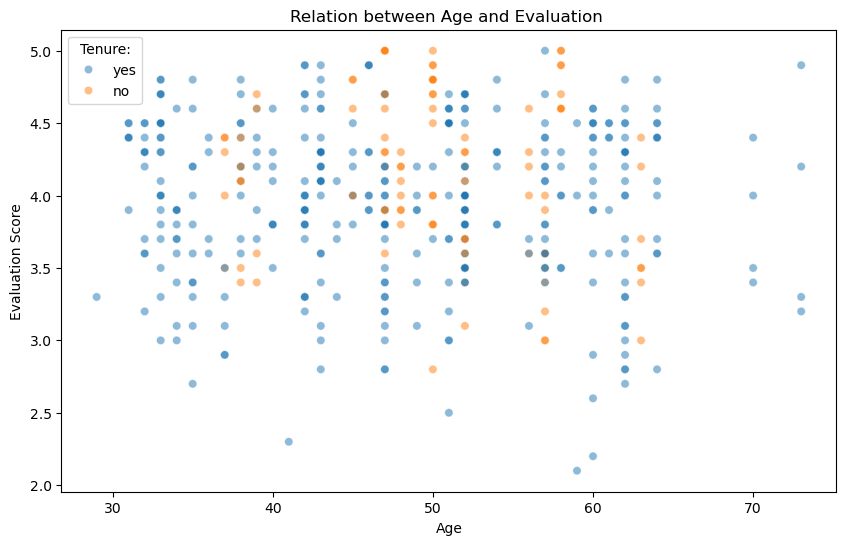

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="age", y="eval", hue="tenure", alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Evaluation Score")
plt.title("Relation between Age and Evaluation ")
plt.legend(title="Tenure:")
plt.show()

Task 5: 2. Are there any noticeable differences in evaluation scores based on "gender"?


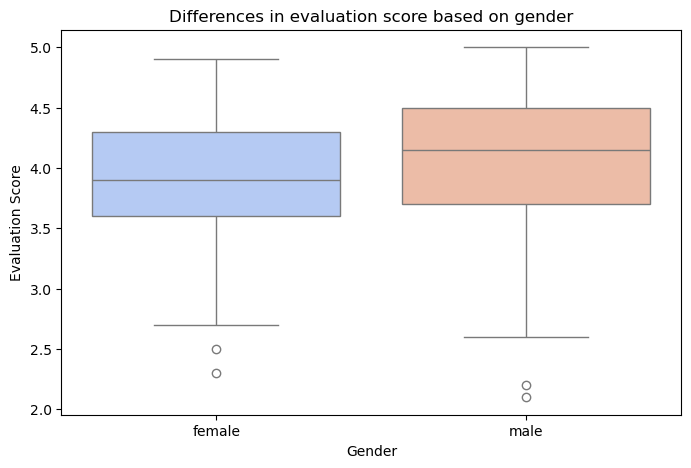

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="gender", y="eval",hue="gender",legend=False, palette="coolwarm")
plt.xlabel("Gender")
plt.ylabel("Evaluation Score")
plt.title("Differences in evaluation score based on gender")
plt.show()


In [19]:
Task 5: 3. How does tenure influence the relationship between "age" and "eval"?

SyntaxError: invalid syntax (2932095450.py, line 1)

In [ ]:
plt.figure(figsize=(10,6))
sns.lmplot(data=df, x="age",y="eval",hue="tenure",aspect=1.2)
plt.xlabel("Age")
plt.ylabel("Evaluation")
plt.title("Effect of tenure on Age vs Evaluations")
plt.show()

##Task 6: Using the teachers' rating dataset, what is the probability of receiving an evaluation score of greater than 4.5.

hints:
1. Calculate the Mean and Standard Deviation.
2. Calculate the Z-Score.
3. Find the Cumulative Probability
4. Compute the Complementary Probability

In [ ]:
mean_eval = df['eval'].mean()
std_eval = df['eval'].std()

z_score = (4.5 - mean_eval) / std_eval
cumulative_probability = norm.cdf(z_score)
prob_greater_4_5 = 1 - cumulative_probability
print("\nProbability of receiving an evaluation score > 4.5:", prob_greater_4_5)
print("\n\n")

##Task 7: Using the teachers' rating dataset, what is the probability of receiving an evaluation score between 2 and 3?

In [ ]:
z_score_2 = (2 - mean_eval) / std_eval
z_score_3 = (3 - mean_eval) / std_eval

cumulative_probability_2 = norm.cdf(z_score_2)
cumulative_probability_3 = norm.cdf(z_score_3)
prob_between_2_and_3 = cumulative_probability_3 - cumulative_probability_2
print("\nProbability of receiving an evaluation score between 2 and 3:", prob_between_2_and_3)
print("\n\n")

##Task 8: Using gender-differentiated scatter plots, plot the relationship between age and teaching evaluation scores.

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='age', y='eval', hue='gender')
plt.title('Scatter Plot of Age vs Evaluation Score by Gender')
plt.xlabel('Age')
plt.ylabel('Evaluation Score')
plt.show()
print("\n\n")

##Task 9: Create a box plot to Compare age along with tenure on the basis of gender.

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='tenure', y='age', hue='gender')
plt.title('Box Plot of Age by Tenure and Gender')
plt.xlabel('Tenure')
plt.ylabel('Age')
plt.show()
print("\n\n")

##Task 10: Calculate the skewness of the evaluation scores using the skew() function and interpret whether the distribution is symmetrical, positively skewed, or negatively skewed. Create a histogram using matplotlib or seaborn to visually confirm the skewness.

In [ ]:
skewness_eval = skew(df['eval'])
print("\nSkewness of Evaluation Scores:", skewness_eval)
if skewness_eval > 0:
    skew_type = "positively skewed"
elif skewness_eval < 0:
    skew_type = "negatively skewed"
else:
    skew_type = "symmetrical"

print(f"The distribution of evaluation scores is {skew_type}.\n")

plt.figure(figsize=(8, 6))
sns.histplot(df['eval'], bins=20, kde=True, color='green')
plt.title('Distribution of Evaluation Scores with Skewness')
plt.xlabel('Evaluation Score')
plt.ylabel('Frequency')
plt.show()